<img src="elkh_logo.svg" style="height: 51px; margin-right: 40px;" /> <img src="julich_logo.png" style="margin-right: 40px;" /> <img src="Apache_Spark_logo.svg.png" style="height: 51px;" />

# About

This notebook shows the implementation of the clustering problem using Apache Spark and the D-Wave quantum hardware.

The layout is as follows:
* first a set of points around three center points are generated in a random manner,
* next, Apache Spark's MLLib is used to determine the center points, and assign the generated points to clusters,
* finally, D-Wave quantum hardware is utilized to perform the clustering.

## Import necessary tools

First we need to import some libraries.

In [1]:
import utilities
import clustering_dwave
import clustering_spark

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Properties of the experiment

You can change the below parameters and re-run the notebook for experimenting:
* `NUM_POINTS`: the number of points to be generated around the three center points,
* `DWAVE_TOKEN`: must be set to the D-Wave Leap token of the user.

In [2]:
NUM_POINTS = 3
DWAVE_TOKEN = ''

## Generate points

In this step the points are generated, presented, and saved to the file called `points.png`.

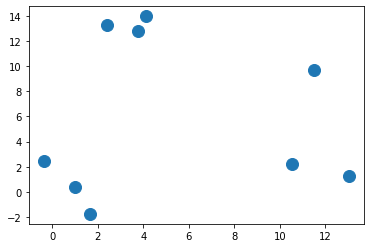

In [3]:
scattered_points = utilities.generate_points(NUM_POINTS)
plt.plot(*zip(*scattered_points), "o", markersize=12)
plt.savefig('points.png')

## Apache Spark

During this step the three center points of the above point set are determined with the help of Apache Spark's MLLib library. This libary offers a number of clustering algorithms, out of which the K-means algorithm is used in this example. The algorithm assigns the input points to three clusters, based on the closest center point. See the file [clustering_spark.py](clustering_spark.py) for details.

In the figure generated, different colors indicate different clusters, and the diamond-shaped points indicate the determined center points for the clusters.

In [4]:
clustering_spark.cluster_points(scattered_points, 'points_clustered_spark.png')

Centers: [array([11.68031867,  4.41681533]), array([0.761514, 0.369126]), array([ 3.45030333, 13.32987533])]
Total Cost: 58.872790261866676


## D-Wave clustering

In this step the D-Wave quantum hardware is used to cluster the points, based on the <a href="https://github.com/dwave-examples/clustering">D-Wave Clustering example</a>.

The example describes the operation of the algorithm in detail. In nutshell, the following are performed before submitting the problem to the D-Wave hardware:
* constraint setup: each point must belong exactly to one cluster,
* Binary Quadratic Model building: points close to each other should belong to the same cluster, and points far from each other should be in different clusters.

There is a parameter available to be set, `NUM_READS`. This indicates the number of states (output solutions) to read from the solver (see the <a href="https://docs.dwavesys.com/docs/latest/c_solver_parameters.html#id35">D-Wave documentation</a> for details. Increasing the value of this parameter allows achieving better solutions for the clustering.

<span style="color: red;"><b>Note:</b></span> make sure the value of `DWAVE_TOKEN` is properly set before running the clustering!

Building constraints...
Building Binary Quadratic Model...
Initializing sampler...
Submitting problem to sampler...
Submission done, waiting for sampler to finish...
Sampler finished
QPU timing information (in microseconds):
{
    "qpu_sampling_time": 2684.4,
    "qpu_anneal_time_per_sample": 20.0,
    "qpu_readout_time_per_sample": 93.68,
    "qpu_access_time": 11132.2,
    "qpu_access_overhead_time": 11879.8,
    "qpu_programming_time": 8447.8,
    "qpu_delay_time_per_sample": 20.54,
    "post_processing_overhead_time": 4244.0,
    "total_post_processing_time": 4244.0
}


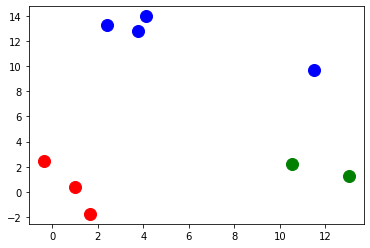

In [5]:
NUM_READS = 20

clustering_dwave.cluster_points(scattered_points, 'points_clustered_dwave.png', DWAVE_TOKEN, num_reads=NUM_READS)

### Problem?

Very likely the low value of `NUM_READS` resulted in invalid clustering. At least, the best solution with so many samples is not valid. Let's see if increasing the value of `NUM_READS` helps to achieve a better result (note: 10000 is the upper limit)!

Building constraints...
Building Binary Quadratic Model...
Initializing sampler...
Submitting problem to sampler...
Submission done, waiting for sampler to finish...
Sampler finished
QPU timing information (in microseconds):
{
    "qpu_sampling_time": 329680.0,
    "qpu_anneal_time_per_sample": 20.0,
    "qpu_readout_time_per_sample": 124.3,
    "qpu_access_time": 338125.8,
    "qpu_access_overhead_time": 16367.2,
    "qpu_programming_time": 8445.8,
    "qpu_delay_time_per_sample": 20.54,
    "post_processing_overhead_time": 1771.0,
    "total_post_processing_time": 9101.0
}


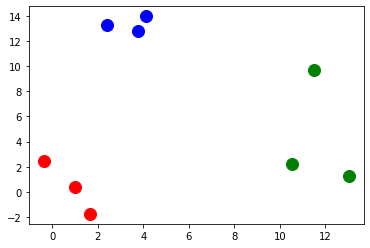

In [6]:
NUM_READS=2000

clustering_dwave.cluster_points(scattered_points, 'points_clustered_dwave.png', DWAVE_TOKEN, num_reads=NUM_READS)